In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
INPUT_DIR = "/gdrive/Shareddrives/ALDA_Project/data/pca_dataset"
IMAGE_SIDE_SIZE = 128

CLASS_NAMES = ["elliptical", "spiral", "irregular", "invalid"]

In [ ]:
X = np.load(os.path.join(INPUT_DIR, "images.npy"))
y = np.load(os.path.join(INPUT_DIR, "labels.npy"))

In [ ]:
print(X.shape)
print(y.shape)

(3820, 128, 128, 3)
(3820,)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import  to_categorical# keras version 2.4.3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [ ]:
y_test = to_categorical(y_test, num_classes=4)
y_train = to_categorical(y_train, num_classes=4)

In [ ]:
from keras.models import  Model
from keras.layers import Input, Conv2D, Dropout, MaxPool2D, Flatten, Dense


from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:

dropout_rate = 0.2

ip = Input(shape = (IMAGE_SIDE_SIZE, IMAGE_SIDE_SIZE, 3))

temp = Conv2D(filters = 16, kernel_size= (3,3), strides=(2,2), padding = "same", activation="relu")(ip)
temp = Dropout(dropout_rate)(temp)
temp = MaxPool2D(pool_size=(2,2), padding = "same")(temp)

temp = Conv2D(filters = 16, kernel_size= (3,3), strides=(2,2), padding = "same", activation="relu")(temp)
temp = Dropout(dropout_rate)(temp)
temp = MaxPool2D(pool_size=(2,2), padding = "same")(temp)

temp = Conv2D(filters = 32, kernel_size= (3,3), strides=(2,2), padding = "same", activation="relu")(temp)
temp = Dropout(dropout_rate)(temp)
temp = MaxPool2D(pool_size=(2,2), padding = "same")(temp)

temp = Conv2D(filters = 32, kernel_size= (3,3), strides=(2,2), padding = "same", activation="relu")(temp)
temp = Dropout(dropout_rate)(temp)
temp = MaxPool2D(pool_size=(2,2), padding = "same")(temp)



# temp = MaxPool2D(pool_size=(2,2), padding = "same")(temp)

# temp = Conv2D(filters = 16, kernel_size= (3,3), padding = "same", activation="relu")(temp)
# temp = Dropout(dropout_rate)(temp)
# temp = Conv2D(filters = 16, kernel_size= (3,3), padding = "same", activation="relu")(temp)
# temp = Dropout(dropout_rate)(temp)
# temp = MaxPool2D(pool_size=(2,2), padding = "same")(temp)

# temp = Conv2D(filters = 32, kernel_size= (3,3), padding = "same", activation="relu")(temp)
# temp = Dropout(dropout_rate)(temp)
# temp = Conv2D(filters = 32, kernel_size= (3,3), padding = "same", activation="relu")(temp)
# temp = Dropout(dropout_rate)(temp)
# temp = MaxPool2D(pool_size=(2,2), padding = "same")(temp)

temp = Flatten()(temp)

temp = Dense(units = 10, activation= "relu")(temp)

op = Dense(units = 4, activation="softmax")(temp)

model = Model(inputs = ip, outputs = op)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0     

In [ ]:
# Defining a function for plotting training and validation learning curves
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [ ]:
epochs = 200
batch_size = 64

callbacks = [
    EarlyStopping(monitor="val_loss", patience=30, verbose=1, restore_best_weights=True),
    # keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, min_lr=0.00001, verbose=1)
]

In [ ]:
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split = 0.2,
    verbose=1,
    shuffle = True
)

Epoch 1/200
34/34 [==============================] - 34s 32ms/step - loss: 1.2858 - accuracy: 0.2554 - val_loss: 0.9734 - val_accuracy: 0.5645
Epoch 2/200
34/34 [==============================] - 1s 19ms/step - loss: 0.8805 - accuracy: 0.6056 - val_loss: 0.6879 - val_accuracy: 0.6766
Epoch 3/200
34/34 [==============================] - 1s 18ms/step - loss: 0.6527 - accuracy: 0.6493 - val_loss: 0.6176 - val_accuracy: 0.7215
Epoch 4/200
34/34 [==============================] - 1s 18ms/step - loss: 0.6204 - accuracy: 0.6756 - val_loss: 0.5639 - val_accuracy: 0.7738
Epoch 5/200
34/34 [==============================] - 1s 18ms/step - loss: 0.5570 - accuracy: 0.7192 - val_loss: 0.5372 - val_accuracy: 0.6935
Epoch 6/200
34/34 [==============================] - 1s 18ms/step - loss: 0.5551 - accuracy: 0.7021 - val_loss: 0.4953 - val_accuracy: 0.8766
Epoch 7/200
34/34 [==============================] - 1s 18ms/step - loss: 0.4712 - accuracy: 0.7844 - val_loss: 0.4441 - val_accuracy: 0.8692
Epoch

36/36 [==============================] - 0s 6ms/step - loss: 0.1073 - accuracy: 0.9660


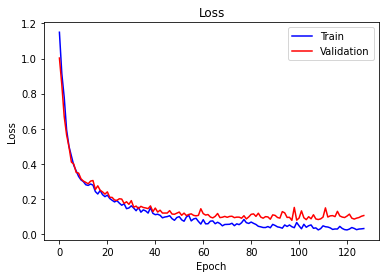

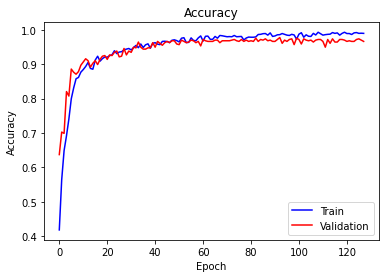

[[287   7   0   0]
 [ 16 271   3   0]
 [  0   1 308   8]
 [  0   0   4 241]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       294
           1       0.97      0.93      0.95       290
           2       0.98      0.97      0.97       317
           3       0.97      0.98      0.98       245

    accuracy                           0.97      1146
   macro avg       0.97      0.97      0.97      1146
weighted avg       0.97      0.97      0.97      1146



In [ ]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

plot_history(history)

y_test_pred = model.predict(X_test)
y_test_pred_sparse = np.argmax(y_test_pred, axis = -1).reshape(-1)
y_test_sparse = np.argmax(y_test, axis = -1).reshape(-1)


from sklearn.metrics import  confusion_matrix, classification_report
print(confusion_matrix(y_test_sparse, y_test_pred_sparse))
print(classification_report(y_test_sparse, y_test_pred_sparse))

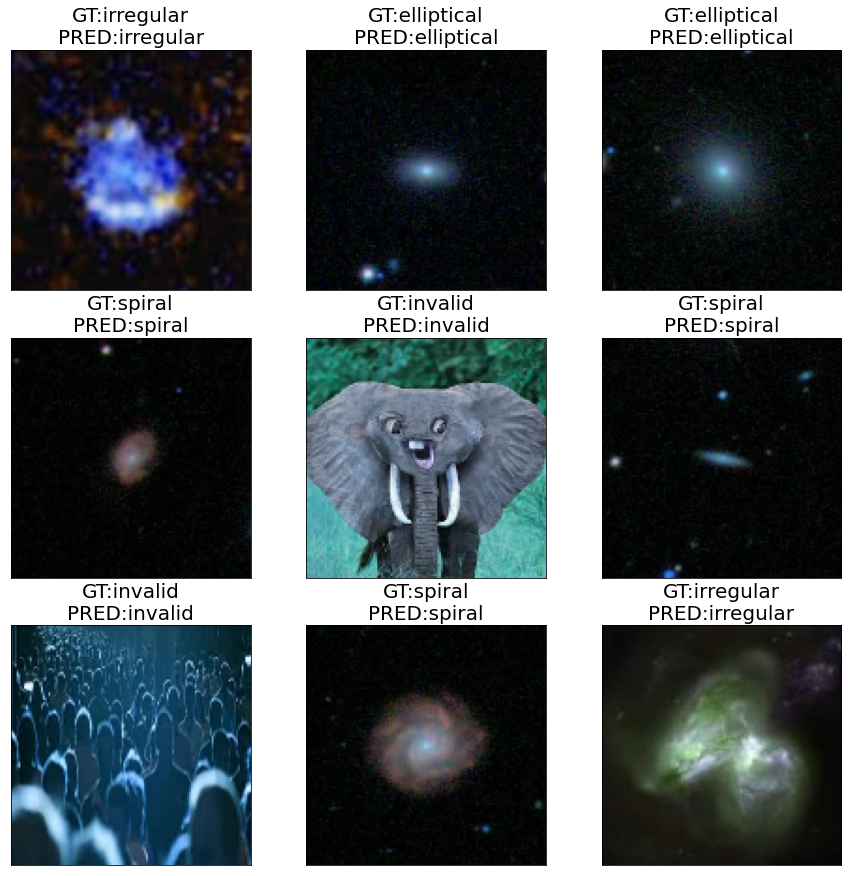

In [ ]:
import random
# sample images
cols = 3
rows = 3
plt.figure(figsize=(cols*5, rows*5))

h_test = model.predict(X_test)
h_test_sparse = np.argmax(h_test, axis = -1)
y_test_sparse = np.argmax(y_test, axis = -1)

for i in range(rows):
  for j in range(cols):
    ax = plt.subplot(rows, cols, i*cols + j+1)
    indx = random.randint(0, y_test.shape[0]-1)

    gt = y_test_sparse[indx]
    pred = h_test_sparse[indx]
    title_string = "GT:" + str(CLASS_NAMES[gt]) + "\nPRED:" + str(CLASS_NAMES[pred])

    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_title(title_string, fontdict={"fontsize": 20})
    ax.imshow(X_test[indx])



# plt.imshow(images[2647])
# print("Actual=", df.Actual[2647])
# print("Prediction=" ,df.Predicted[2647])

In [ ]:
model.save(os.path.join("/gdrive/Shareddrives/ALDA_Project/data/cnn", "cnn_model.h5"))

In [ ]:
filename = "/gdrive/Shareddrives/ALDA_Project/data/cnn.sav"
pickle.dump(model, open(filename, 'wb'))